# **U.S. Domestic Commodity Flow: Regression**
**By: Ayemhenre Isikhuemhen**  
**November 28, 2025**

**File Descirption:** This a jupyter notebook file is dedicated towards the U.S. Commodity Flow Data Mining Project. The code featured in this file is focused on leveraging regression data mining techniques.

## Regression Overview
Talk about what I am doing: Project Set up - Intial File Exploration: Visualization - Questions: 

### Project Setup

In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Regression Dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Visualization Constraints
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 120)
sns.set(style="whitegrid")

# Load data
file_path = r"C:\Users\Owner\Documents\GitHub\Data-Mining-Final-Project\Data Files\comodity2017.csv"
df = pd.read_csv(file_path)

# Df Shape
print(df.shape)
df.head()

(1048575, 20)


,SHIPMT_ID,ORIG_STATE,ORIG_MA,ORIG_CFS_AREA,DEST_STATE,DEST_MA,DEST_CFS_AREA,NAICS,QUARTER,SCTG,MODE,SHIPMT_VALUE,SHIPMT_WGHT,SHIPMT_DIST_GC,SHIPMT_DIST_ROUTED,TEMP_CNTL_YN,EXPORT_YN,EXPORT_CNTRY,HAZMAT,WGT_FACTOR
0,1,6,99999,06-99999,6,260,06-260,326,4,43,5,4380,391,54,60,N,N,N,N,328.3
1,2,49,482,49-482,47,314,47-314,4541,3,43,14,56,4,1524,1810,N,N,N,N,8425.3
2,3,6,348,06-348,6,348,06-348,4231,4,34,5,255,440,2,5,N,N,N,N,9120.7
3,4,6,260,06-260,6,99999,06-99999,212,4,11,5,250,44912,30,35,N,N,N,N,20.9
4,5,45,273,45-273,45,273,45-273,45431,4,19,5,46,73,9,11,N,N,N,H,1733.8


### Intial File Exploration

In [3]:
print("Basic DataFrame Info:")
df.info()
print()
print("Dataframe Descirption")
df.describe()

Basic DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 20 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   SHIPMT_ID           1048575 non-null  int64  
 1   ORIG_STATE          1048575 non-null  int64  
 2   ORIG_MA             1048575 non-null  int64  
 3   ORIG_CFS_AREA       1048575 non-null  object 
 4   DEST_STATE          1048575 non-null  int64  
 5   DEST_MA             1048575 non-null  int64  
 6   DEST_CFS_AREA       1048575 non-null  object 
 7   NAICS               1048575 non-null  int64  
 8   QUARTER             1048575 non-null  int64  
 9   SCTG                1048575 non-null  object 
 10  MODE                1048575 non-null  int64  
 11  SHIPMT_VALUE        1048575 non-null  int64  
 12  SHIPMT_WGHT         1048575 non-null  int64  
 13  SHIPMT_DIST_GC      1048575 non-null  int64  
 14  SHIPMT_DIST_ROUTED  1048575 non-null  int64 

,SHIPMT_ID,ORIG_STATE,ORIG_MA,DEST_STATE,DEST_MA,NAICS,QUARTER,MODE,SHIPMT_VALUE,SHIPMT_WGHT,SHIPMT_DIST_GC,SHIPMT_DIST_ROUTED,WGT_FACTOR
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,5.242880e+05,2.908364e+01,3.876737e+04,2.878322e+01,3.956260e+04,8.527142e+03,2.439977e+00,7.238447e+00,1.510316e+04,2.907865e+04,3.872609e+02,4.753405e+02,2.656200e+03
std,3.026977e+05,1.568280e+01,4.695228e+04,1.584014e+01,4.689833e+04,5.347247e+04,1.106954e+00,4.386159e+00,7.553447e+05,1.013306e+06,5.821130e+02,6.981747e+02,1.722064e+04
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.040000e+02,2.120000e+02,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e-01
25%,2.621445e+05,1.700000e+01,3.120000e+02,1.500000e+01,3.240000e+02,3.260000e+02,1.000000e+00,4.000000e+00,1.460000e+02,1.100000e+01,1.600000e+01,2.100000e+01,1.075000e+02
50%,5.242880e+05,2.900000e+01,4.760000e+02,2.900000e+01,4.880000e+02,4.233000e+03,2.000000e+00,5.000000e+00,7.490000e+02,1.900000e+02,1.060000e+02,1.350000e+02,3.505000e+02
75%,7.864315e+05,4.200000e+01,9.999900e+04,4.200000e+01,9.999900e+04,4.244000e+03,3.000000e+00,1.400000e+01,5.219500e+03,5.955000e+03,5.350000e+02,6.740000e+02,1.190100e+03
max,1.048575e+06,5.600000e+01,9.999900e+04,5.600000e+01,9.999900e+04,5.511140e+05,4.000000e+00,1.010000e+02,3.297804e+08,4.366540e+08,5.137000e+03,6.876000e+03,7.864000e+05


### Visualization One: Correlation Heatmap

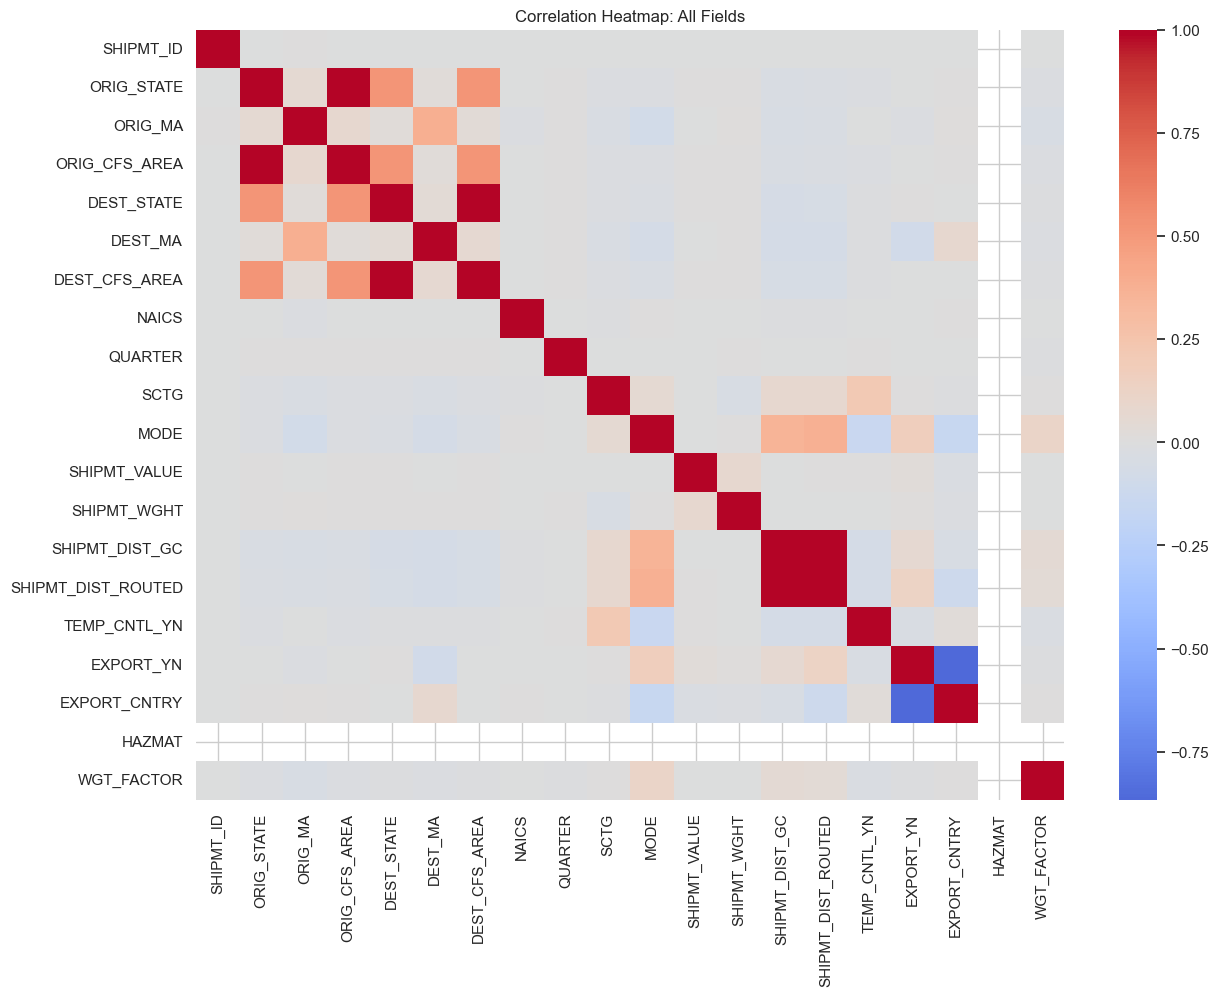

In [4]:
# Copy dataframe
corr_df = df.copy()

# Convert to Binary
binary_cols = ['TEMP_CNTL_YN', 'EXPORT_YN', 'HAZMAT']
for col in binary_cols:
    corr_df[col] = corr_df[col].map({'Y':1, 'N':0})

# Label encode remaining categorical columns
for col in corr_df.columns:
    if corr_df[col].dtype == 'object':
        corr_df[col] = corr_df[col].astype('category').cat.codes

# Compute correlation
corr_matrix = corr_df.corr()

# Heatmap
plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap: All Fields")
plt.show()

### Visualization Two: Shipment Value by Commodity

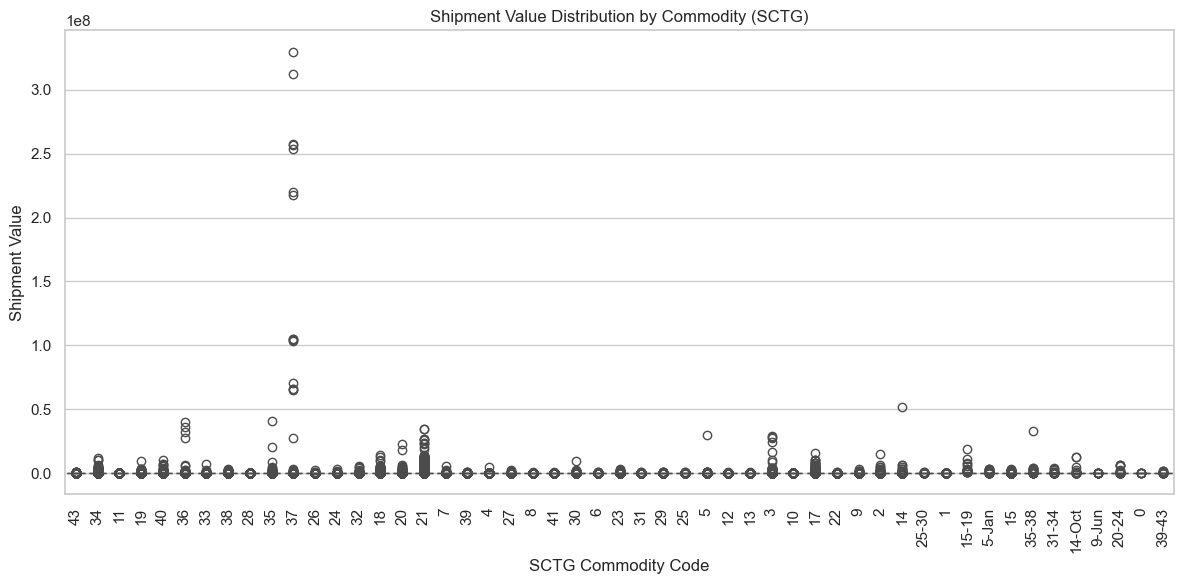

In [5]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='SCTG', y='SHIPMT_VALUE')
plt.xticks(rotation=90)
plt.title("Shipment Value Distribution by Commodity (SCTG)")
plt.xlabel("SCTG Commodity Code")
plt.ylabel("Shipment Value")
plt.tight_layout()
plt.show()

### Regression Preprocessing

In [6]:
data = df.copy()

# Convert Y/N fields
data['TEMP_CNTL'] = data['TEMP_CNTL_YN'].map({'Y':1, 'N':0})
data['EXPORT'] = data['EXPORT_YN'].map({'Y':1, 'N':0})
data['HAZ'] = data['HAZMAT'].map({'N':0, 'P':1, 'H':1})

# Derived features
data['DIST_RATIO'] = (
    data['SHIPMT_DIST_ROUTED'] / 
    data['SHIPMT_DIST_GC'].replace({0: np.nan})
).fillna(1)

data['VALUE_PER_LB'] = (
    data['SHIPMT_VALUE'] /
    data['SHIPMT_WGHT'].replace(0, np.nan)
).fillna(0)

# Selected features
selected_features = [
    'SCTG',
    'MODE',
    'NAICS',
    'SHIPMT_WGHT',
    'SHIPMT_DIST_GC',
    'SHIPMT_DIST_ROUTED',
    'DIST_RATIO',
    'TEMP_CNTL',
    'EXPORT',
    'HAZ',
    'VALUE_PER_LB'
]

X = data[selected_features]
y = data['SHIPMT_VALUE']

# Encode any remaining categorical variables
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = X[col].astype('category').cat.codes

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)


C:\Users\Owner\AppData\Local\Temp\ipykernel_2676\1090752063.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype('category').cat.codes


### Predicting Shipment Outcomes

In [7]:
# Linear Regression Pipeline
pipeline_lr = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(score_func=f_regression, k=8)),
    ('model', LinearRegression())
])

pipeline_lr.fit(X_train, y_train)
y_pred_lr = pipeline_lr.predict(X_test)

# Ridge Regression Pipeline
pipeline_ridge = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(score_func=f_regression, k=8)),
    ('model', Ridge(alpha=5.0))
])

pipeline_ridge.fit(X_train, y_train)
y_pred_ridge = pipeline_ridge.predict(X_test)

# Evaluation function
def evaluate(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return rmse, mae, r2

# Evaluate models
lr_metrics = evaluate(y_test, y_pred_lr)
ridge_metrics = evaluate(y_test, y_pred_ridge)

### Results

In [8]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Ridge Regression"],
    "RMSE": [lr_metrics[0], ridge_metrics[0]],
    "MAE": [lr_metrics[1], ridge_metrics[1]],
    "R²": [lr_metrics[2], ridge_metrics[2]]
})

results

,Model,RMSE,MAE,R²
0,Linear Regression,274762.042490,19513.391431,0.082407
1,Ridge Regression,274762.091402,19513.392800,0.082406
